Importación de librerías a utilizar

In [2]:
import pandas as pd
import re
import spacy as spc
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

Importación de base de datos

In [12]:
DATOS = pd.read_csv("df_mini_HS - df_mini_HS.csv")

Descarga de herramientas

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ingeo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ingeo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Convertir a minúsculas, eliminar caracteres especiales y números, Tokenizar y Eliminar stopwords

In [6]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Tokenizar
    words = word_tokenize(text)
    # Eliminar stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

Imprimir datos

In [22]:
print(DATOS.head())

   label                                               text
0      1  ESAS COSAS Y OTRAS PUEDEN PASAR POR MANTENER A...
1      1  28: te amodio, odio a la perra de tu amiga ☺️☺...
2      1  @LaDivinaDiva Callate maldita perra. O seguro ...
3      1  @MarysabelPuerto Mejor callate cara de puta o ...
4      1  @xarita327 @TRIKYHUMOR @yonier2012 @casTa1326 ...


In [26]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Tokenizar
    words = word_tokenize(text)
    # Eliminar stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [28]:
DATOS['texto_procesado'] = DATOS['text'].apply(preprocess_text)


Vectorizar

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(DATOS['texto_procesado'])

In [34]:
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_bow['clase'] = DATOS['label']

Imprimir vectores creados

In [36]:
print (df_bow)

    abc_es  acoso  agar  agresión  akonmuhkn  amiga  amodio  analicemos  \
0        0      0     0         1          0      0       0           0   
1        0      0     0         0          0      1       1           0   
2        0      0     0         0          0      0       0           0   
3        0      0     0         0          0      0       0           0   
4        0      0     0         0          0      0       0           0   
5        0      0     0         0          0      0       0           0   
6        0      0     0         0          0      0       0           0   
7        0      0     0         0          0      0       0           0   
8        0      0     0         0          0      0       0           0   
9        0      1     0         0          0      0       0           1   
10       0      0     0         0          1      0       0           0   
11       0      0     1         0          0      0       0           0   
12       0      1     0  

IDentificar la distribución de clases

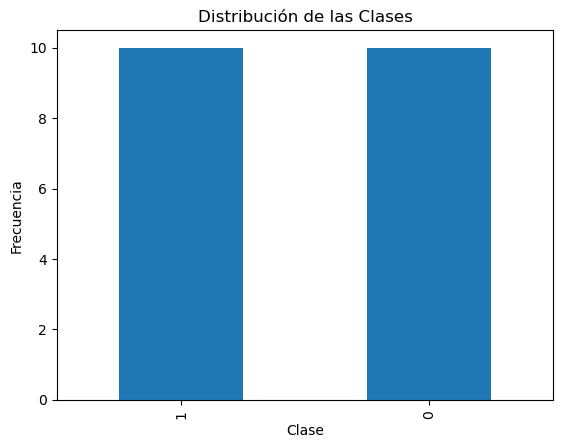

In [38]:
import matplotlib.pyplot as plt

# Distribución de las clases
df_bow['clase'].value_counts().plot(kind='bar')
plt.title('Distribución de las Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

Evaluación de modelo

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_bow.drop('clase', axis=1), df_bow['clase'], test_size=0.2, random_state=42)

# Entrenar el modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



Crear matriz de confusión para verificar la efectividad del procesamiento

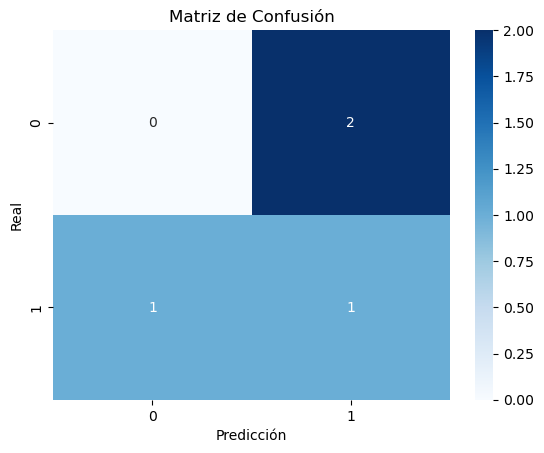

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Conteo de vectores creadis para identificar palabras más comunes

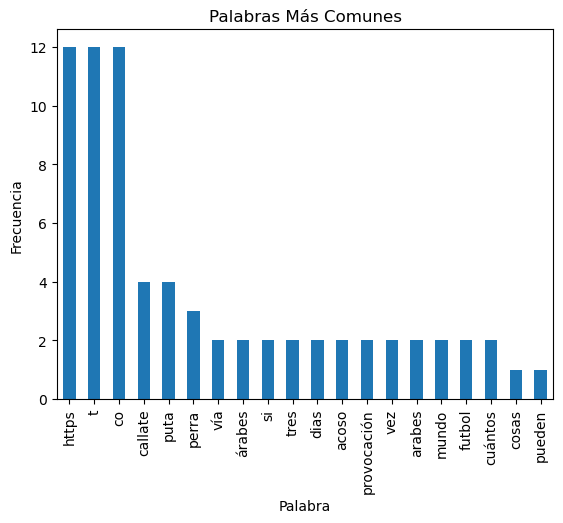

In [48]:
import matplotlib.pyplot as plt
from collections import Counter

# Contar las palabras más comunes
word_counts = Counter(" ".join(DATOS['texto_procesado']).split())
common_words = word_counts.most_common(20)

# Crear un DataFrame para las palabras más comunes
df_common_words = pd.DataFrame(common_words, columns=['Palabra', 'Frecuencia'])

# Graficar la distribución de las palabras más comunes
df_common_words.plot(kind='bar', x='Palabra', y='Frecuencia', legend=False)
plt.title('Palabras Más Comunes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.show()

Graficar las tasas de valores verdaderos y falsos positivos

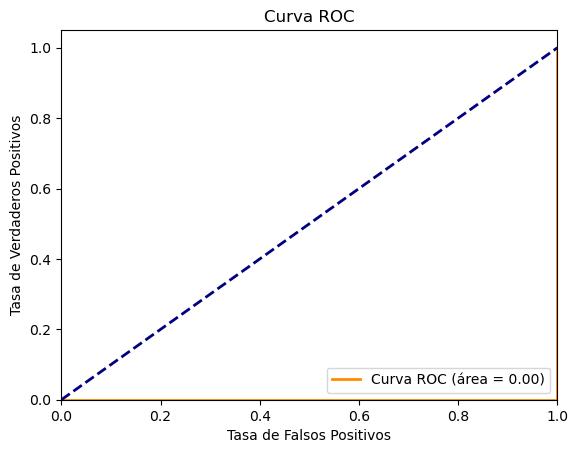

In [50]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Crear base de datos CVS Bag of Words para identificar los conteos

In [44]:
df_bow.to_csv('bag_of_words.csv', index=False)